# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2021-1**<br>
**Profesora:** Paula Aguirre <br>

## Clases 24: Clasificación kNN.


In [1]:
#from sklearn import datasets
import pandas as pd
import matplotlib.pylab as plt
plt.rcParams['font.size'] = 18

import numpy as np
import sklearn as sk

from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


##  1. Introducción.

Los métodos de clasificación corresponden a algortimos de aprendizaje supervisado que permiten predecir el valor de una variable categórica a partir de un conjunto de variables predictoras, que a su vez pueden ser numéricas o categóricas.

Cuando la variable de salida es binaria, podemos aplicar el modelo de regresión logística. En el caso que la variable dependiente tenga 3 o más valores posibles, es de utilidad el método de clasificación kNN (que también se puede aplicar al caso binario).



## 2. Clasificación k-NN

###  Clasificación binaria con normalización.

En este ejemplo, usaremos un dataset de RRSS para predecir si una persona realiza o no una compra luego de hacer clikc en un aviso publicitario en la red. Para ello, se requiere crear un clasificador que clasifique a cada usuario en la categoría correcta en base a sus características: compra o no compra.

Como predictores, utilizaremos la edad y salario estimado del usuario.

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
#seleccionamos las variables predictoras y la variable dependiente
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


Text(0, 0.5, 'N')

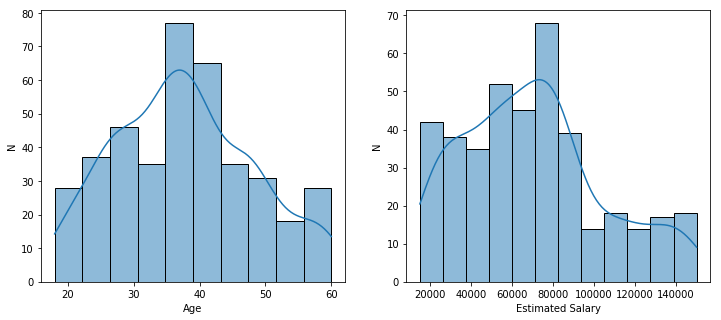

In [4]:
#veamos la distribución de valores originales
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.histplot(ax=ax1,data=X,x='Age',kde=True)
ax1.set_xlabel('Age')
ax1.set_ylabel('N')

sns.histplot(ax=ax2,data=X,x='EstimatedSalary',kde=True)
ax2.set_xlabel('Estimated Salary')
ax2.set_ylabel('N')

In [10]:
#Creamos los datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

#normalizamos los datos

In [12]:
#opción 2: normalización con StandardScaler
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train) #esto genera un np.array
X_test_sc = sc.fit_transform(X_test)

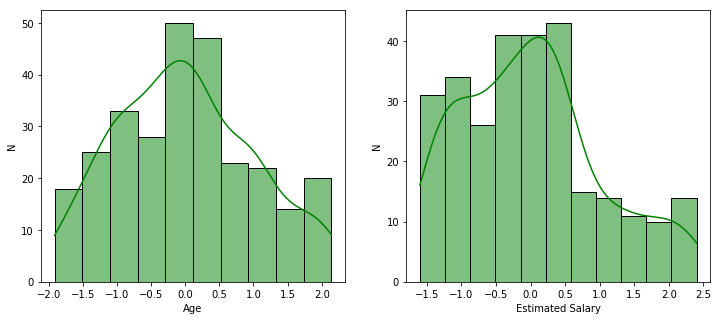

In [13]:
#veamos la distribución de valores normalizados
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.histplot(ax=ax1,data=X_train_sc[:,0],kde=True,color='green')
ax1.set_xlabel('Age')
ax1.set_ylabel('N')

sns.histplot(ax=ax2,data=X_train_sc[:,1],kde=True,color='green')
ax2.set_xlabel('Estimated Salary')
ax2.set_ylabel('N')
fig.savefig('scaled.png',dpi=300,bbox_inches='tight')

Conclusión: ambas formas de normalización (manual y StandardScaler) dan el mismo resultado.

In [14]:
#definimos el clasificador y ajustamos a los datos de entrenamiento
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
classifier.fit(X_train_sc, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
#predecimos las categorías para el dataset de prueba
y_pred_test = classifier.predict(X_test_sc)

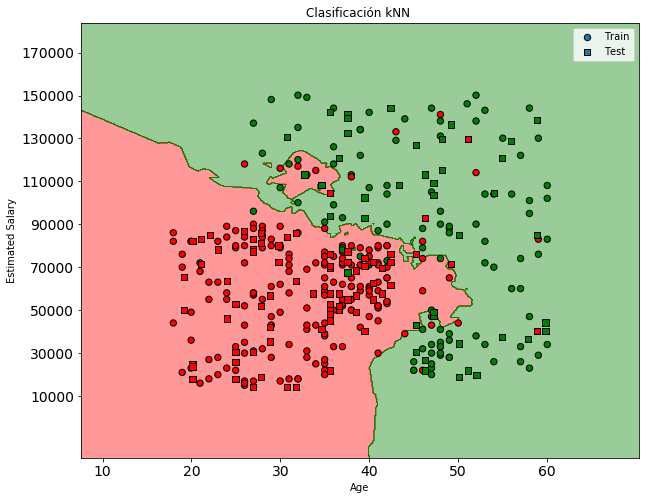

In [19]:
#visualizemos los resultados

from matplotlib.colors import ListedColormap

#creamos una grilla con valores de X1 (Age) y X2 (EstimatedSalary)
X1, X2 = np.meshgrid(np.arange(X_train_sc[:,0].min()-1, X_train_sc[:,0].max()+1,0.01),
                     np.arange(X_train_sc[:,1].min()-1,X_train_sc[:,1].max()+1,0.01))


#predecimos la clase de salida para cada par de puntos (X1,X2) de la grilla
#X1, X2 son matrices con los valores en cada punto de la grilla. 
#X1.ravel() son las versiones "flattened". Para la predicción, transformamos X1, X2 en vectores
# luego con reshape volvemos a darle la forma de matrix (grilla) al vector de resultados
X_grid=np.array([X1.ravel(), X2.ravel()]).T
mesh_predict=classifier.predict(X_grid).reshape(X1.shape)

fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)

#grafico de contornos de mesh_predict, para visualizar la frontera entre las dos clases
im=ax.contourf(X1, X2, mesh_predict, alpha = 0.4, cmap = ListedColormap(('red', 'green')))
#plot de los datos de entrenamiento
ax.scatter(X_train_sc[:,0],X_train_sc[:,1],c=y_train,s=40,edgecolors='k',cmap=ListedColormap(('red', 'green')),label='Train')
ax.scatter(X_test_sc[:,0],X_test_sc[:,1],c=y_test,marker='s',s=40,edgecolors='k',cmap=ListedColormap(('red', 'green')),label='Test')

#limites de los ejes
ax.set_xlim(X1.min(), X1.max())
ax.set_ylim(X2.min(), X2.max())
             
ax.set_title('Clasificación kNN ')
ax.set_xlabel('Age')
ax.set_ylabel('Estimated Salary')


xlabels=np.arange(10,70,10)
xticks=(xlabels-X_train['Age'].mean())/X_train['Age'].std()
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels,fontsize=14)

ylabels=np.arange(10000,180000,20000)
yticks=(ylabels-X_train['EstimatedSalary'].mean())/X_train['EstimatedSalary'].std()
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels,fontsize=14)
ax.legend()


### ¿Qué tan buena resultó la clasificación?

Para evaluar la calidad de la clasificación, calculamos la matrix de confusión y las métricas de rendimiento considerando las predicciones y clases reales de los datos de prueba.

Estas métricas están implementadas en el módulo `sklearn.metrics`.

Confusion matrix: [[73  5]
 [ 4 38]]
Accuracy: 0.925
Recall: 0.9047619047619048
Precision: 0.8837209302325582
F score: 0.8941176470588236
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        78
           1       0.88      0.90      0.89        42

   micro avg       0.93      0.93      0.93       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.93      0.93      0.93       120



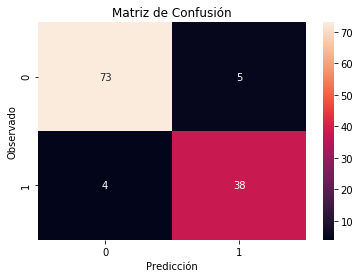

In [20]:
from sklearn import metrics
import seaborn as sns

#matriz de confusión
cm=metrics.confusion_matrix(y_test,y_pred_test) #true,pred
print('Confusion matrix:',cm)

#graficamos la matriz de confusión
sns.heatmap(cm,annot=True)
plt.ylabel('Observado')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')

accuracy=metrics.accuracy_score(y_test,y_pred_test)
print('Accuracy:',accuracy) #(72+37)/120

recall=metrics.recall_score(y_test,y_pred_test)
print('Recall:',recall) #21/32

precision=metrics.precision_score(y_test,y_pred_test)
print('Precision:',precision) #21/25

fscore=metrics.f1_score(y_test,y_pred_test)
print('F score:',fscore)

#también podemos imprimir un resumen de las métricas de clasificación
report0=metrics.classification_report(y_test,y_pred_test)
print(report0)

### ¿Cómo cambia la clasificación para distintos valores de k?

In [21]:
#datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

#normalizamos los datos
#opción 2: normalización con StandardScaler
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train) #esto genera un np.array
X_test_sc = sc.fit_transform(X_test)

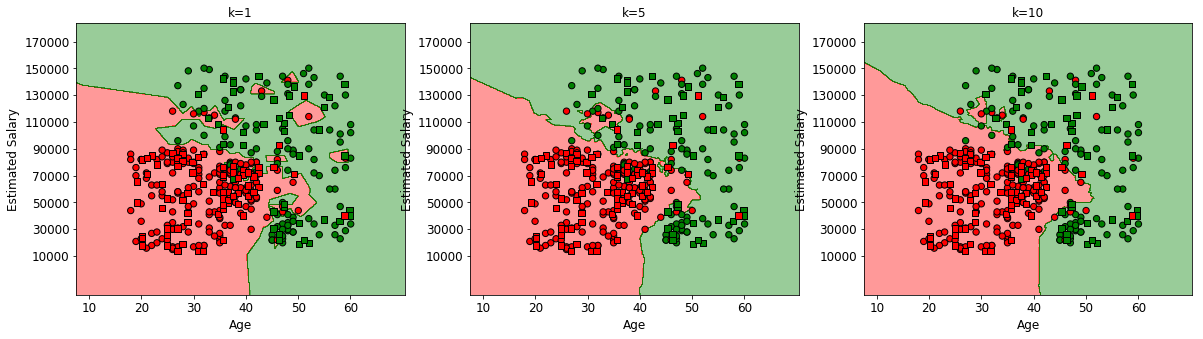

In [22]:
fig=plt.figure(figsize=(20,5))

accuracy_train=[]
accuracy_test=[]

ks=[1,5,10]
for nk,k in enumerate(ks):
    
    #definimos el clasificador y ajustamos a los datos de entrenamiento
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    classifier.fit(X_train_sc, y_train)

    #predicción para datos de entrenamiento y prueba
    y_pred_train=classifier.predict(X_train_sc)
    y_pred_test=classifier.predict(X_test_sc)
    accuracy_test.append(metrics.accuracy_score(y_test,y_pred_test))
    accuracy_train.append(metrics.accuracy_score(y_train,y_pred_train))
    
    #creamos una grilla con valores de X1 (Age) y X2 (EstimatedSalary)
    X1, X2 = np.meshgrid(np.arange(X_train_sc[:,0].min()-1, X_train_sc[:,0].max()+1,0.01),
                     np.arange(X_train_sc[:,1].min()-1,X_train_sc[:,1].max()+1,0.01))


    #predecimos la clase de salida para cada par de puntos (X1,X2) de la grilla

    X_grid=np.array([X1.ravel(), X2.ravel()]).T
    mesh_predict=classifier.predict(X_grid).reshape(X1.shape)

    
    ax=fig.add_subplot(1,3,nk+1)

    #grafico de contornos de mesh_predict, para visualizar la frontera entre las dos clases
    im=ax.contourf(X1, X2, mesh_predict, alpha = 0.4, cmap = ListedColormap(('red', 'green')))

    #plot de los datos de entrenamiento
    ax.scatter(X_train_sc[:,0],X_train_sc[:,1],c=y_train,s=40,edgecolors='k',cmap=ListedColormap(('red', 'green')),label='Train')
    ax.scatter(X_test_sc[:,0],X_test_sc[:,1],c=y_test,marker='s',s=40,edgecolors='k',cmap=ListedColormap(('red', 'green')),label='Test')

    #limites de los ejes
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())

    ax.set_title('k=%d'%k,fontsize=12)
    ax.set_xlabel('Age',fontsize=12)
    ax.set_ylabel('Estimated Salary',fontsize=12)


    xlabels=np.arange(10,70,10)
    xticks=(xlabels-X_train['Age'].mean())/X_train['Age'].std()
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels,fontsize=12)

    ylabels=np.arange(10000,180000,20000)
    yticks=(ylabels-X_train['EstimatedSalary'].mean())/X_train['EstimatedSalary'].std()
    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabels,fontsize=12)
    #ax.legend();


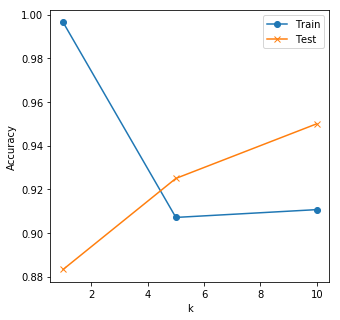

In [23]:
#grafiquemos la precisión para los distintos valores de k:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)

ax.plot(ks,accuracy_train,'o-',label='Train')
ax.plot(ks,accuracy_test,'x-',label='Test')
ax.set_ylabel('Accuracy')
ax.set_xlabel('k')

ax.legend();

In [9]:
#Usando GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)


grid_params={'n_neighbors':np.arange(1,20,1)}

sc = StandardScaler()

X_sc = sc.fit_transform(X) #esto genera un np.array
X_train_sc = sc.fit_transform(X_train) #esto genera un np.array
X_test_sc = sc.fit_transform(X_test)

gs=GridSearchCV(KNeighborsClassifier(),grid_params,verbose=1,cv=5)
gs_results=gs.fit(X_train_sc, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


In [10]:
print(gs_results.best_estimator_,gs_results.best_score_)

KNeighborsClassifier(n_neighbors=15) 0.8964285714285716
